# Forse AI, Data Analysis and ML assignment

## Discussion and Future works



### Analysis Summary
In this notebok I have analysed the insurance dataset for Forse AI. Firstly, I explored hidden patterns, evaluated correlations, and visualized data distributions. My main finding was that the target variable, claim_ratio which is derived from claim amount (for risk assesment only), had many zero values, representing legitimate data points.

Since these 0s were actual data points I didn't remove them to avoid losing any information.

I developed three ML models that produced good predictions with high R2 and low MSE and MAE. However, I still suspect a potential bias towards predicting zeros.

### Future Work
To address this issue in future analyses, I consider using resampling techniques such SMOTE (for labels) to balance the dataset.







## EDA

Starting with loading the data, importing pandas and conducting initial exploratory data analysis before cleaning (EDA).

Here, I examine the structure of dataset, checking the descriptive statistics, key measures, identifying missing values and summarizing the dataset.






In [105]:
import pandas as pd
import numpy as np

file_path = 'insurance_data_sample.csv'
data = pd.read_csv(file_path)

print(data.head())
print(data.describe())
print(data.isnull().sum())
print(data.info())

         Car_id        Date Customer Name Gender  Annual Income  \
0  C_CND_000001  01/02/2022     Geraldine   Male          13500   
1  C_CND_000002  01/02/2022           Gia   Male        1480000   
2  C_CND_000003  01/02/2022        Gianna   Male        1035000   
3  C_CND_000004  01/02/2022       Giselle   Male          13500   
4  C_CND_000005  01/02/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                        Engine Transmission       Color  Price ($)  \
0  DoubleÃ‚Â Overhead Camshaft         Auto       Black      26000   
1  DoubleÃ‚Â Overhead Camshaft         Auto       Black      19000   
2 

Since the colum names were not followig fixed naming convention, I have standardized the names by converting them to lowercase, and trailing spaces. To do this, I have used 're' library.

P.S. The column 'Amount_paid_for_insurance' was following different rule than others, therefore, I had to specify the change for this column exclusively.

In [106]:
# name convention
import re

def clean_column_name(name):
    if name == 'Amount_paid_for_insurance':
        return 'amount_paid_for_insurance'
    name = name.strip().lower()
    name = re.sub(r'\s+', '_', name)
    name = re.sub(r'\W+', '_', name)
    name = re.sub(r'^_+|_+$', '', name)
    return name

# change all column names
data.columns = [clean_column_name(col) for col in data.columns]

print(data.columns.tolist())
print(data.columns)

['car_id', 'date', 'customer_name', 'gender', 'annual_income', 'dealer_name', 'company', 'model', 'engine', 'transmission', 'color', 'price', 'dealer_no', 'body_style', 'phone', 'amount_paid_for_insurance', 'claim_amount', 'city']
Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price', 'dealer_no', 'body_style', 'phone',
       'amount_paid_for_insurance', 'claim_amount', 'city'],
      dtype='object')


As the goal was to asses features that is related to risks, I have decided to create a new feature 'claim_ratio'. This feature simply defines the ratio of claim amount to amount paid to insurance by the customer, identifies whether the claim amounts are proportionally high or low compared to the premiums paid.

In [107]:
data['claim_ratio'] = data['claim_amount'] / data['amount_paid_for_insurance']
print(data.head())

         car_id        date customer_name gender  annual_income  \
0  C_CND_000001  01/02/2022     Geraldine   Male          13500   
1  C_CND_000002  01/02/2022           Gia   Male        1480000   
2  C_CND_000003  01/02/2022        Gianna   Male        1035000   
3  C_CND_000004  01/02/2022       Giselle   Male          13500   
4  C_CND_000005  01/02/2022         Grace   Male        1465000   

                           dealer_name   company       model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                        engine transmission       color  price   dealer_no  \
0  DoubleÃ‚Â Overhead Camshaft         Auto       Black  26000  06457-3834   
1  DoubleÃ‚Â Overhead Camshaft         Auto       Black 


For easier analysis I created a new column called 'car_type' by combining the 'company' and 'model' columns. This combined information allows for more straightforward aggregation and comparison.

In [108]:
data['car_type'] = data['company'] + '-' + data['model']

data.drop(['company', 'model', 'car_id', 'customer_name', 'phone', 'dealer_no'], axis=1, inplace=True)

print(data.head())

         date gender  annual_income                          dealer_name  \
0  01/02/2022   Male          13500  Buddy Storbeck's Diesel Service Inc   
1  01/02/2022   Male        1480000                     C & M Motors Inc   
2  01/02/2022   Male        1035000                          Capitol KIA   
3  01/02/2022   Male          13500               Chrysler of Tri-Cities   
4  01/02/2022   Male        1465000                    Chrysler Plymouth   

                        engine transmission       color  price body_style  \
0  DoubleÃ‚Â Overhead Camshaft         Auto       Black  26000        SUV   
1  DoubleÃ‚Â Overhead Camshaft         Auto       Black  19000        SUV   
2            Overhead Camshaft       Manual         Red  31500  Passenger   
3            Overhead Camshaft       Manual  Pale White  14000        SUV   
4  DoubleÃ‚Â Overhead Camshaft         Auto         Red  24500  Hatchback   

   amount_paid_for_insurance  claim_amount     city  claim_ratio  \
0           

The following code generates density plots to visualize the distribution of two key variables: annual income and claim ratio uising 'kdeplot' from seaborn.

<ipython-input-109-6a08b9db4bba>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['annual_income'], shade=True, ax=axes[0])
<ipython-input-109-6a08b9db4bba>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['claim_ratio'], shade=True, ax=axes[1])


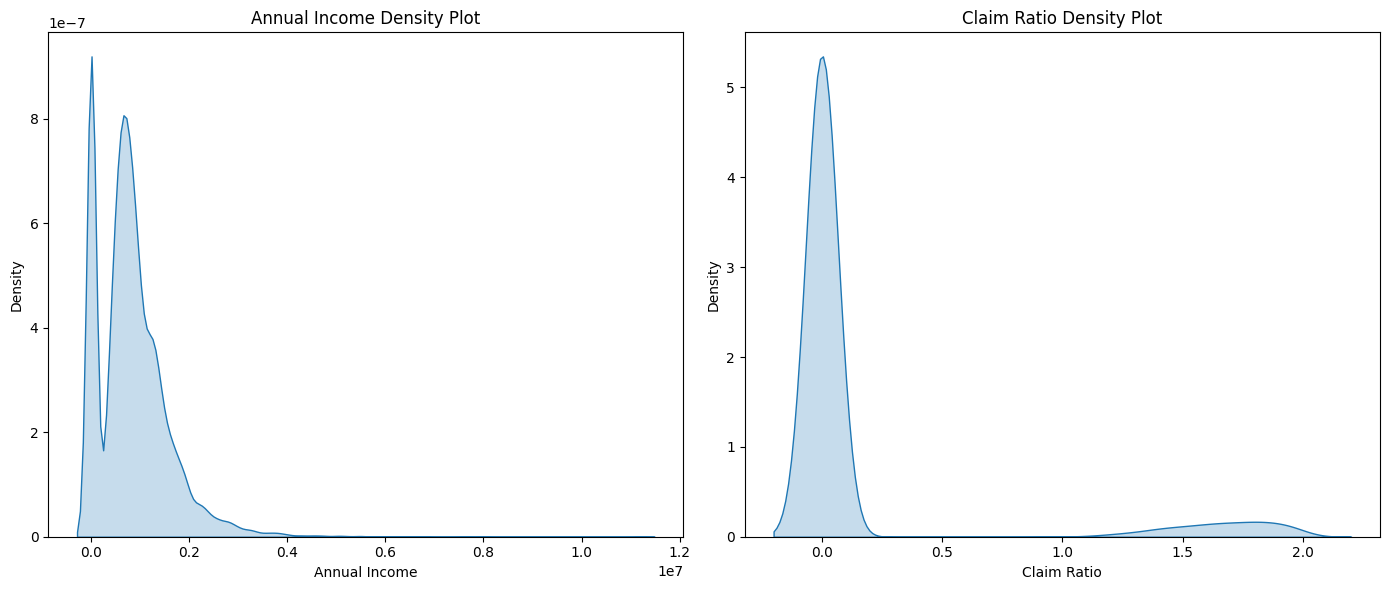

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# subplots for side by side visual
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# annual income
sns.kdeplot(data['annual_income'], shade=True, ax=axes[0])
axes[0].set_title('Annual Income Density Plot')
axes[0].set_xlabel('Annual Income')
axes[0].set_ylabel('Density')

# claim Ratio
sns.kdeplot(data['claim_ratio'], shade=True, ax=axes[1])
axes[1].set_title('Claim Ratio Density Plot')
axes[1].set_xlabel('Claim Ratio')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

In this section, I generate box plots to visualize the distribution and identify potential outliers for two key variables: annual income and claim ratio

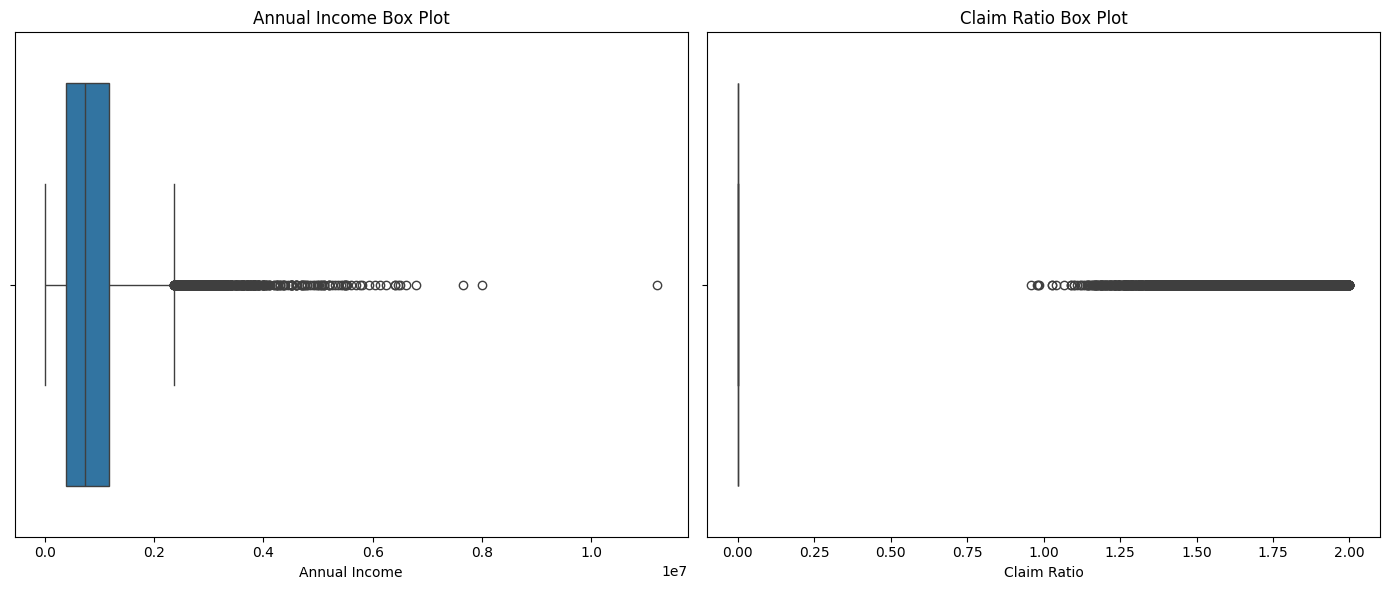

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='annual_income', data=data, ax=axes[0])
axes[0].set_title('Annual Income Box Plot')
axes[0].set_xlabel('Annual Income')

sns.boxplot(x='claim_ratio', data=data, ax=axes[1])
axes[1].set_title('Claim Ratio Box Plot')
axes[1].set_xlabel('Claim Ratio')

plt.tight_layout()
plt.show()

Here I perform grouped and pivot table analysis to explore the relationships between categorical variables and key metrics as annual_income and claim_ratio.

In [111]:
grouped_data = data.groupby('gender')[['annual_income', 'claim_ratio']].mean()
print(grouped_data)

pivot_table = data.pivot_table(values=['annual_income', 'claim_ratio'], index='city', columns='gender', aggfunc='mean')
print(pivot_table)


        annual_income  claim_ratio
gender                            
Female  755973.021339     0.165148
Male    851184.044207     0.166596
            annual_income                claim_ratio          
gender             Female           Male      Female      Male
city                                                          
Daugavpils  755499.648428  832601.323709    0.178338  0.164944
Jelgava     733891.048077  870813.107417    0.171635  0.166115
Liepaja     798843.406213  859284.511801    0.158804  0.166193
Riga        765784.242215  831389.904808    0.153392  0.152831
Tukums      731781.688712  857660.428298    0.166737  0.179376
Ventspils   750716.785885  855051.429267    0.162018  0.170129


In this section, I perform a time series analysis to observe trends over time for claim amount and claim ratio. I start by creating a temporary copy of the DataFrame and ensure the 'date' column is in datetime format. Then, I set 'date' as the index.

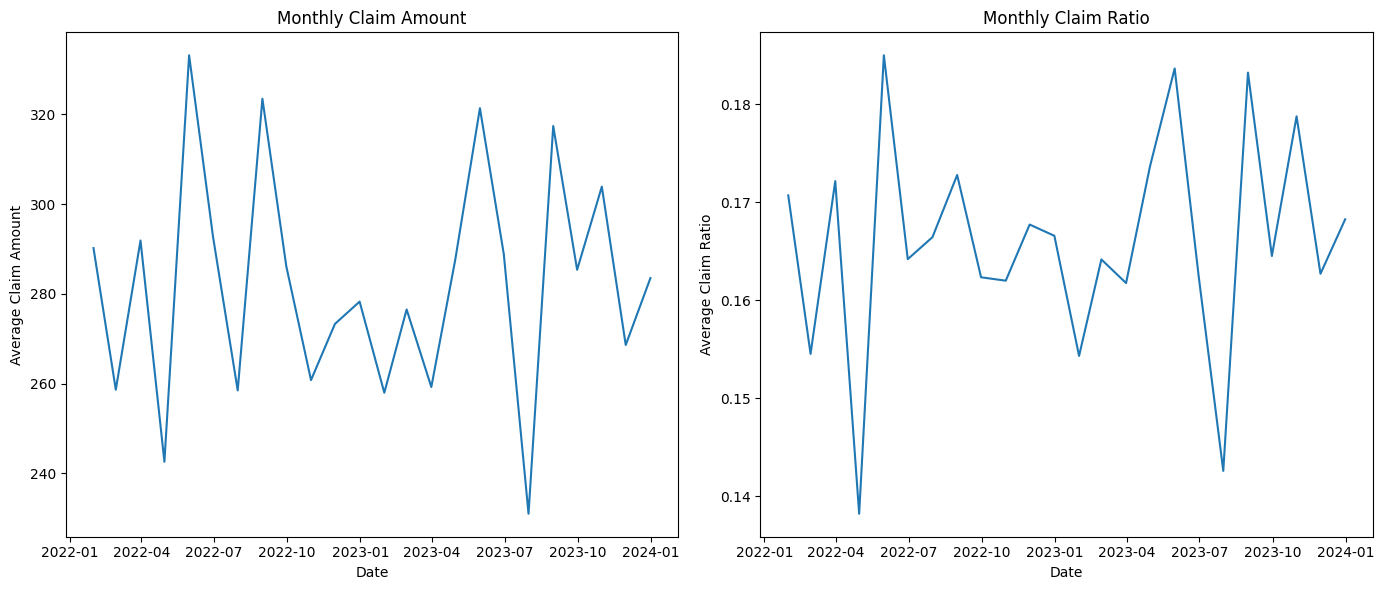

In [112]:
# create temp data for date, I will use the original date later
temp_data = data.copy()

temp_data['date'] = pd.to_datetime(temp_data['date'])

# first index
temp_data.set_index('date', inplace=True)

monthly_claims = temp_data['claim_amount'].resample('M').mean()
monthly_claim_ratio = temp_data['claim_ratio'].resample('M').mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(monthly_claims)
axes[0].set_title('Monthly Claim Amount')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Average Claim Amount')

axes[1].plot(monthly_claim_ratio)
axes[1].set_title('Monthly Claim Ratio')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Average Claim Ratio')

plt.tight_layout()
plt.show()

Here, I create scatter plots to explore the relationships between annual income and two key variables as price and claim ratio, differentiated by gender.

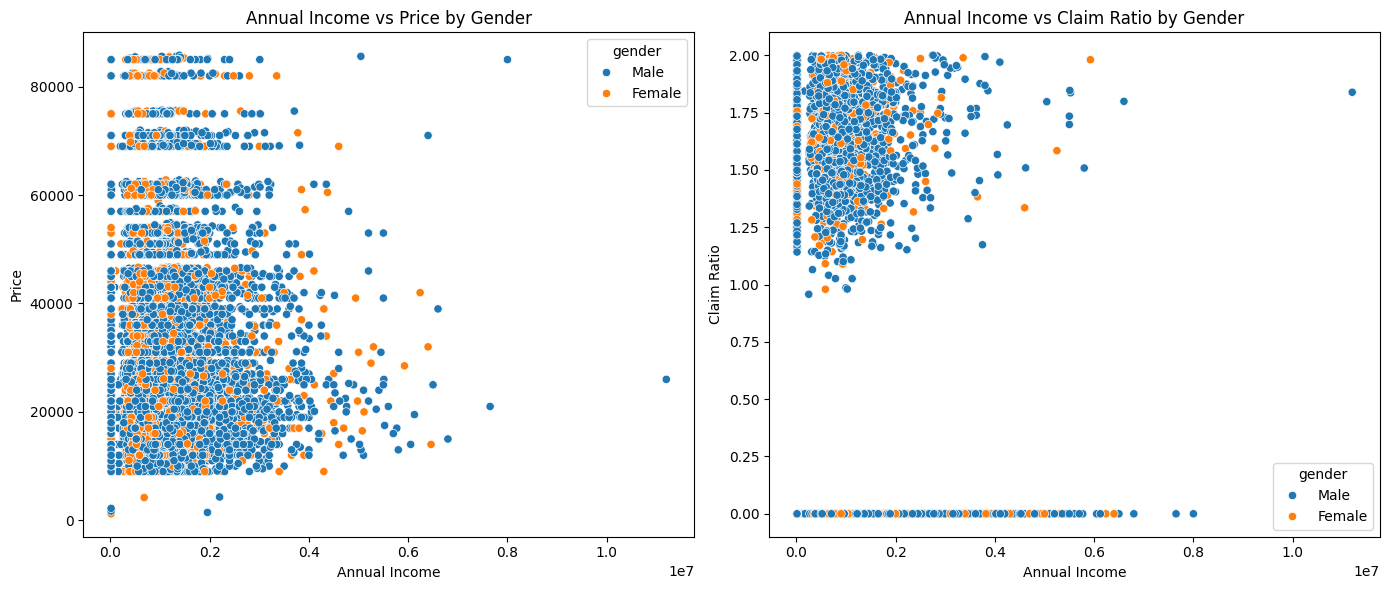

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x='annual_income', y='price', hue='gender', data=data, ax=axes[0])
axes[0].set_title('Annual Income vs Price by Gender')
axes[0].set_xlabel('Annual Income')
axes[0].set_ylabel('Price')

sns.scatterplot(x='annual_income', y='claim_ratio', hue='gender', data=data, ax=axes[1])
axes[1].set_title('Annual Income vs Claim Ratio by Gender')
axes[1].set_xlabel('Annual Income')
axes[1].set_ylabel('Claim Ratio')

plt.tight_layout()
plt.show()


 Here, I analyze the average claim ratio and claim amount by gender. First, I group the data by 'gender' and calculate the mean values for 'claim_ratio' and 'claim_amount'. This provides a summary of the average claims statistics for each gender.

   gender  claim_ratio  claim_amount
0  Female     0.165148    283.926586
1    Male     0.166596    282.065645


<ipython-input-114-6b6b658c8d72>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='claim_ratio', data=gender_claim_stats, palette='viridis', ax=axes[0])
<ipython-input-114-6b6b658c8d72>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='claim_amount', data=gender_claim_stats, palette='viridis', ax=axes[1])


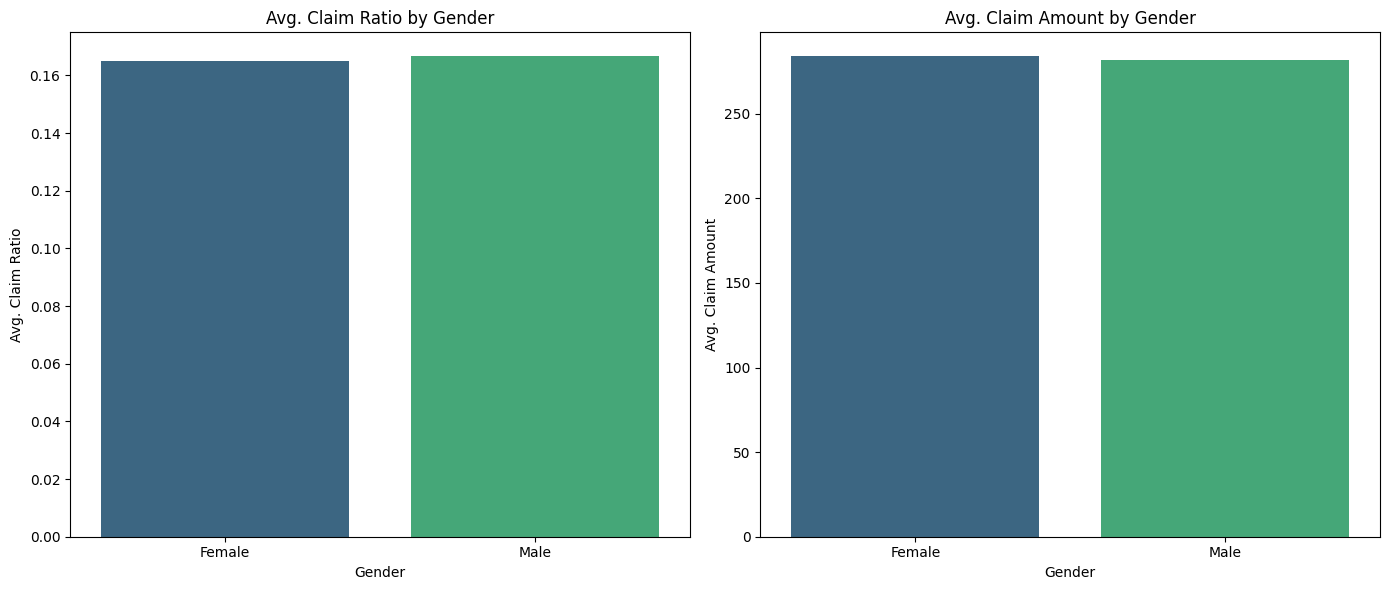

In [114]:
gender_claim_stats = data.groupby('gender')[['claim_ratio', 'claim_amount']].mean().reset_index()

print(gender_claim_stats)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='gender', y='claim_ratio', data=gender_claim_stats, palette='viridis', ax=axes[0])
axes[0].set_title('Avg. Claim Ratio by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Avg. Claim Ratio')

sns.barplot(x='gender', y='claim_amount', data=gender_claim_stats, palette='viridis', ax=axes[1])
axes[1].set_title('Avg. Claim Amount by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Avg. Claim Amount')

plt.tight_layout()
plt.show()

To identify the car types with the highest claim amounts, I first aggregated the data to calculate the total claim amount for each car. I then extracted the top 50 car types with the highest total claim amounts.Next, I computed the average claim amount for each of these car types. To visualize this, I created a bar plot using *Seaborn* and *Matplotlib*.

<ipython-input-115-de56e8bf9aa1>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='car_type', y='claim_amount', data=avg_claim_amounts, ci=None)


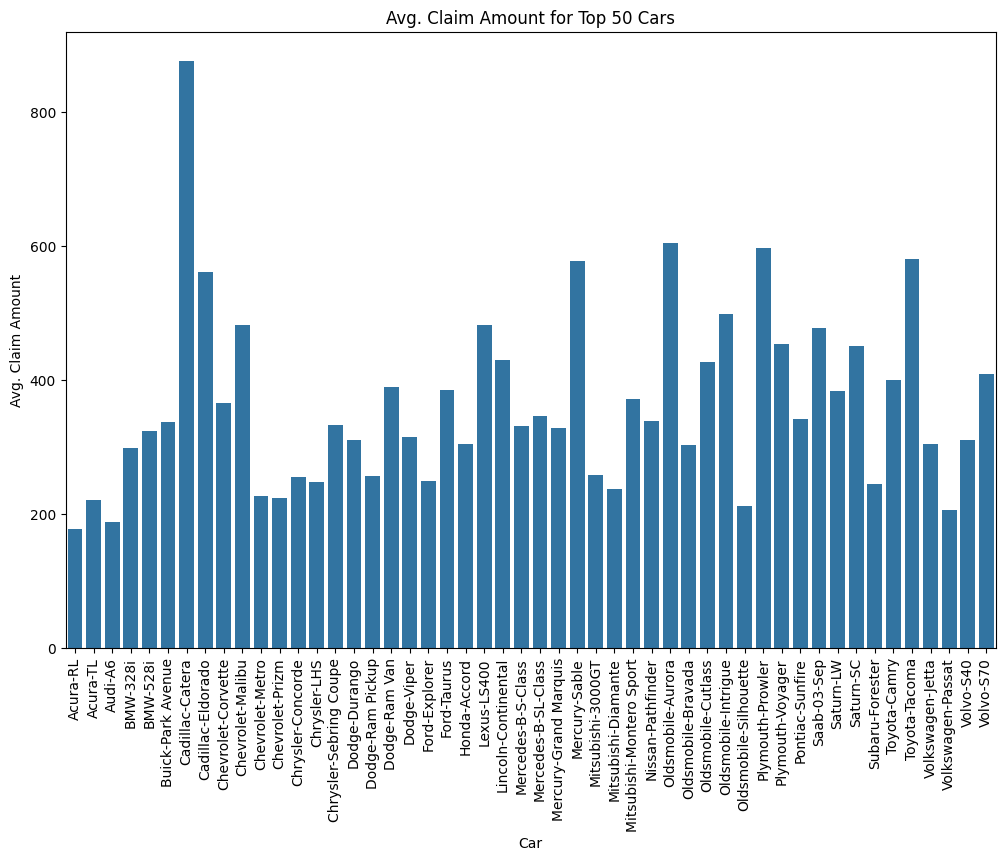

                car_type  claim_amount
17129  Cadillac-Eldorado        8560.0


In [115]:
# aggregate the data for the total claim amount for each car
car_claim_totals = data.groupby('car_type')['claim_amount'].sum().reset_index()

# 50 car types with highest claim amounts
top_50_cars = car_claim_totals.nlargest(50, 'claim_amount')
top_50_data = data[data['car_type'].isin(top_50_cars['car_type'])]

# average claim amount for each car
avg_claim_amounts = top_50_data.groupby('car_type')['claim_amount'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='car_type', y='claim_amount', data=avg_claim_amounts, ci=None)
plt.title('Avg. Claim Amount for Top 50 Cars')
plt.xlabel('Car')
plt.ylabel('Avg. Claim Amount')
plt.xticks(rotation=90)
plt.show()

data_sorted = data.sort_values(by='claim_amount', ascending=False)
highest_claim_car = data_sorted.head(1)

print(highest_claim_car[['car_type', 'claim_amount']])

Following the same steps to plot the claim ratio.




<ipython-input-116-fef8a3ca338c>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='car_type', y='claim_ratio', data=avg_claim_amounts, ci=None)


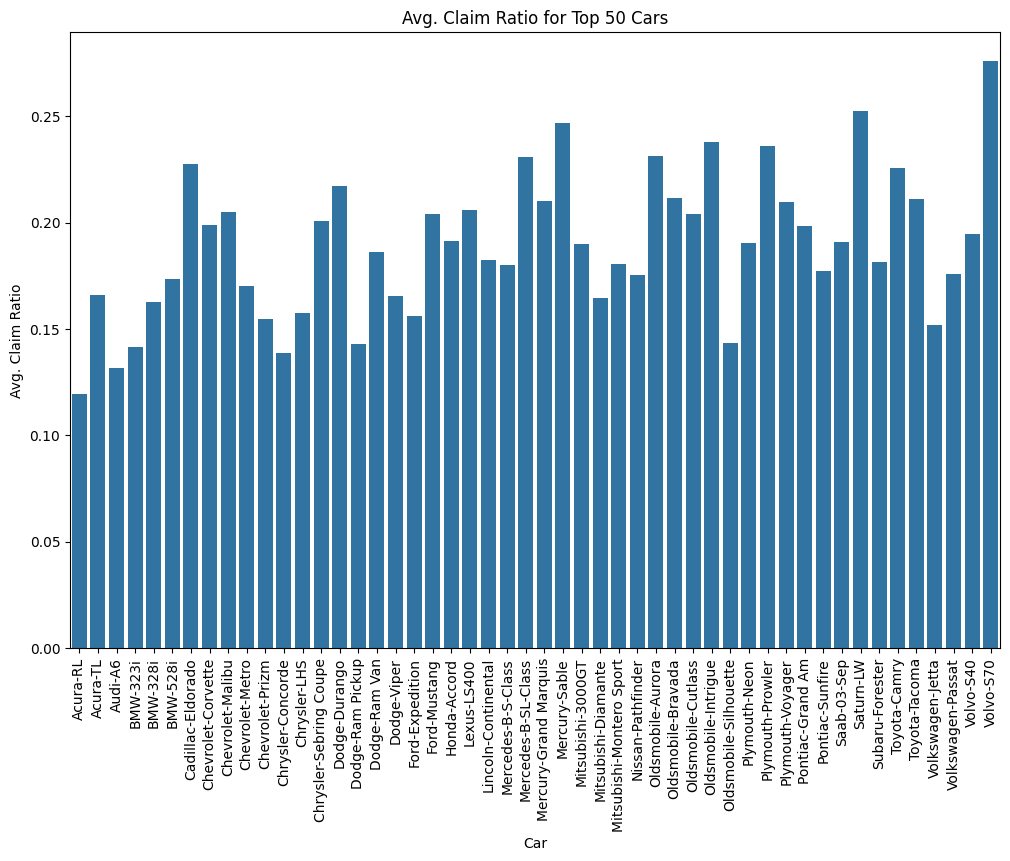

                  car_type  claim_ratio
15190  Ford-Crown Victoria          2.0
mean: 0.1662869270886908


In [116]:
car_claim_totals = data.groupby('car_type')['claim_ratio'].sum().reset_index()

top_50_cars = car_claim_totals.nlargest(50, 'claim_ratio')
top_50_data = data[data['car_type'].isin(top_50_cars['car_type'])]

avg_claim_amounts = top_50_data.groupby('car_type')['claim_ratio'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='car_type', y='claim_ratio', data=avg_claim_amounts, ci=None)
plt.title('Avg. Claim Ratio for Top 50 Cars')
plt.xlabel('Car')
plt.ylabel('Avg. Claim Ratio')
plt.xticks(rotation=90)
plt.show()

data_sorted = data.sort_values(by='claim_ratio', ascending=False)
highest_claim_car = data_sorted.head(1)

# car with highest claim ratio
print(highest_claim_car[['car_type', 'claim_ratio']])

print("mean:", data.claim_ratio.mean())

Following the same steps to plot the claim amount per city.

<ipython-input-117-716f782038cc>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='city', y='claim_amount', data=avg_claim_amounts_city, ci=None, ax=axes[0])
<ipython-input-117-716f782038cc>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='city', y='claim_ratio', data=avg_claim_ratios_city, ci=None, ax=axes[1])


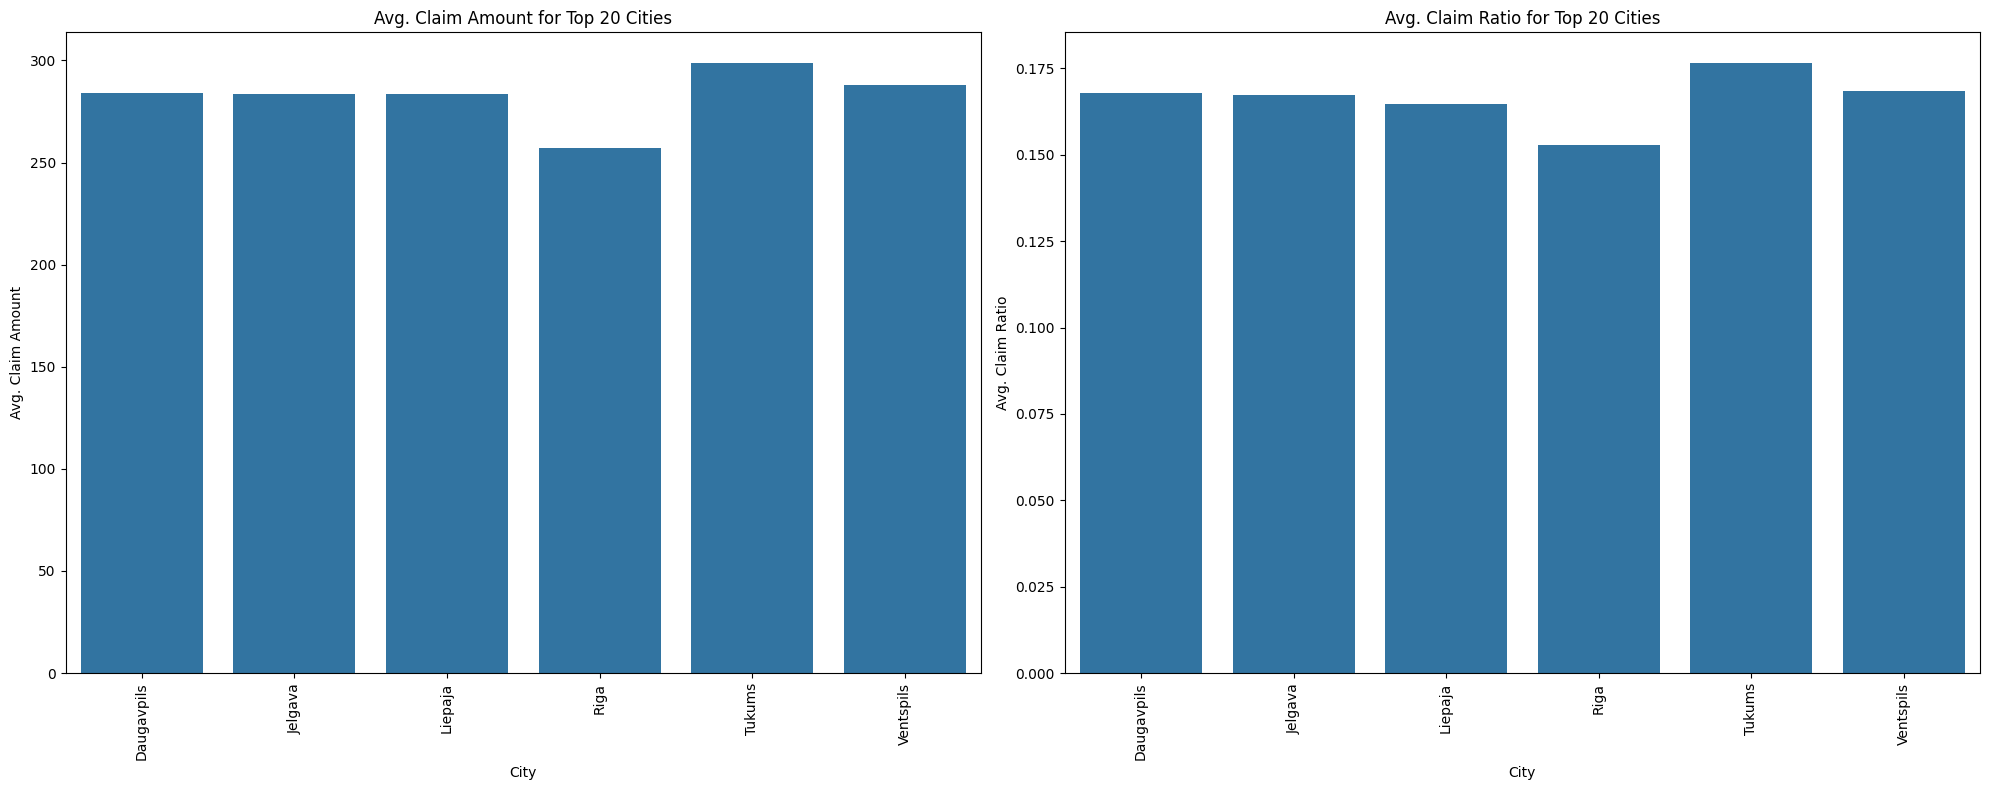

City with the highest avg. claim amount:
     city  claim_amount
4  Tukums    298.800649
City with the highest average claim ratio:
     city  claim_ratio
4  Tukums      0.17661
Mean Claim Ratio: 0.1662869270886908


In [117]:
city_claim_totals = data.groupby('city')['claim_amount'].sum().reset_index()

top_20_cities_amount = city_claim_totals.nlargest(20, 'claim_amount')
top_20_data_amount = data[data['city'].isin(top_20_cities_amount['city'])]

avg_claim_amounts_city = top_20_data_amount.groupby('city')['claim_amount'].mean().reset_index()
city_claim_totals_ratio = data.groupby('city')['claim_ratio'].sum().reset_index()

top_20_cities_ratio = city_claim_totals_ratio.nlargest(20, 'claim_ratio')
top_20_data_ratio = data[data['city'].isin(top_20_cities_ratio['city'])]

avg_claim_ratios_city = top_20_data_ratio.groupby('city')['claim_ratio'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(x='city', y='claim_amount', data=avg_claim_amounts_city, ci=None, ax=axes[0])
axes[0].set_title('Avg. Claim Amount for Top 20 Cities')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Avg. Claim Amount')
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(x='city', y='claim_ratio', data=avg_claim_ratios_city, ci=None, ax=axes[1])
axes[1].set_title('Avg. Claim Ratio for Top 20 Cities')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Avg. Claim Ratio')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

city_claim_ratios = data.groupby('city')['claim_amount'].mean().reset_index()
highest_claim_ratio_city = city_claim_ratios.nlargest(1, 'claim_amount')
print("City with the highest avg. claim amount:")
print(highest_claim_ratio_city[['city', 'claim_amount']])

city_claim_ratios = data.groupby('city')['claim_ratio'].mean().reset_index()
highest_claim_ratio_city = city_claim_ratios.nlargest(1, 'claim_ratio')
print("City with the highest average claim ratio:")
print(highest_claim_ratio_city[['city', 'claim_ratio']])

print("Mean Claim Ratio:", data['claim_ratio'].mean())

## **ML (1)** Creating ideal customer profile (ICP) with original dataset, using classification

To classify car insurance policies as 'ideal' or 'non-ideal', I computed average values for price, claim_amount, and amount_paid_for_insurance. Customers were labeled 'ideal' if they had a price above average, a claim_amount below average, and an amount_paid_for_insurance above average; otherwise, they were labeled 'non-ideal'.







In [118]:
# here I deifne criteria for ICP
avg_price = data['price'].mean()
avg_claim_amount = data['claim_amount'].mean()
avg_amount_paid = data['amount_paid_for_insurance'].mean()


for index, row in data.iterrows():
    # check conditions
    if row['price'] > avg_price and row['claim_amount'] < avg_claim_amount and row['amount_paid_for_insurance'] > avg_amount_paid:
        data.at[index, 'ICP label'] = 'ideal'
    else:
        data.at[index, 'ICP label'] = 'non-ideal'

I used these labels to train a RandomForestClassifier with the features price, claim_amount, and amount_paid_for_insurance. After splitting the dataset into training and testing sets, I trained the model and evaluated its accuracy. Finally, I predicted labels for the entire dataset, storing the results in a new column called 'ICP label' and printed the updated dataset.

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# drop target variable icp label
X = data[['price', 'claim_amount', 'amount_paid_for_insurance']]
y = data['ICP label']

# splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)

# train model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluation
print(accuracy_score(y_test, y_pred))

# predicting on entire dataset
data['Predicted ICP label'] = model.predict(X)

print(data)

1.0
             date  gender  annual_income                          dealer_name  \
0      01/02/2022    Male          13500  Buddy Storbeck's Diesel Service Inc   
1      01/02/2022    Male        1480000                     C & M Motors Inc   
2      01/02/2022    Male        1035000                          Capitol KIA   
3      01/02/2022    Male          13500               Chrysler of Tri-Cities   
4      01/02/2022    Male        1465000                    Chrysler Plymouth   
...           ...     ...            ...                                  ...   
23901  12/31/2023    Male          13500                     C & M Motors Inc   
23902  12/31/2023  Female         900000       Ryder Truck Rental and Leasing   
23903  12/31/2023    Male         705000               Chrysler of Tri-Cities   
23904  12/31/2023    Male          13500                    Chrysler Plymouth   
23905  12/31/2023    Male        1225000                      Pars Auto Sales   

                       

Here I create scatter plot to visualize segmentation by ICP label

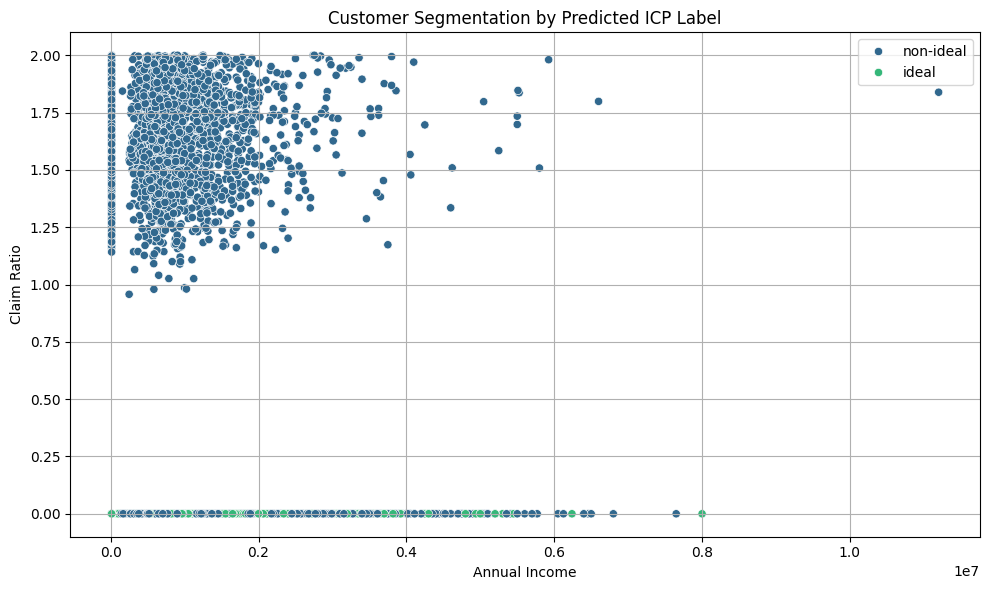

In [120]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='claim_ratio', hue='Predicted ICP label', data=data, palette='viridis')
plt.title('Customer Segmentation by Predicted ICP Label')
plt.xlabel('Annual Income')
plt.ylabel('Claim Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Data preprocessing and Feature Engineering for further prediction of risk assesment

To prepare the dataset for modeling, I used a LabelEncoder to encode categorical variables into numeric format. I applied the LabelEncoder to all object-type columns except for the 'date' column, as I will use it for ARIMA model later.

In [121]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in data.select_dtypes(include=['object']).columns.drop('date'):
    data[column] = label_encoder.fit_transform(data[column])

print(data.head())

         date  gender  annual_income  dealer_name  engine  transmission  \
0  01/02/2022       1          13500            0       0             0   
1  01/02/2022       1        1480000            1       0             0   
2  01/02/2022       1        1035000            2       1             1   
3  01/02/2022       1          13500            4       1             1   
4  01/02/2022       1        1465000            3       0             0   

   color  price  body_style  amount_paid_for_insurance  claim_amount  city  \
0      0  26000           3                       1665           0.0     3   
1      0  19000           3                       1332        1900.0     2   
2      2  31500           2                       1897           0.0     3   
3      1  14000           3                       1176           0.0     1   
4      2  24500           1                       1323        2450.0     2   

   claim_ratio  car_type  ICP label  Predicted ICP label  
0     0.000000       

To explore the relationships between different features  I created a new DataFrame by dropping the 'date' column. Then computed the correlation matrix for the remaining numeric features.  This visualization helps to identify strong positive or negative correlations between features. As I can see, there is strong positive correlation between 'price' and 'amount paid for insurance' as well as 'claim amount' and 'claim ratio'. 

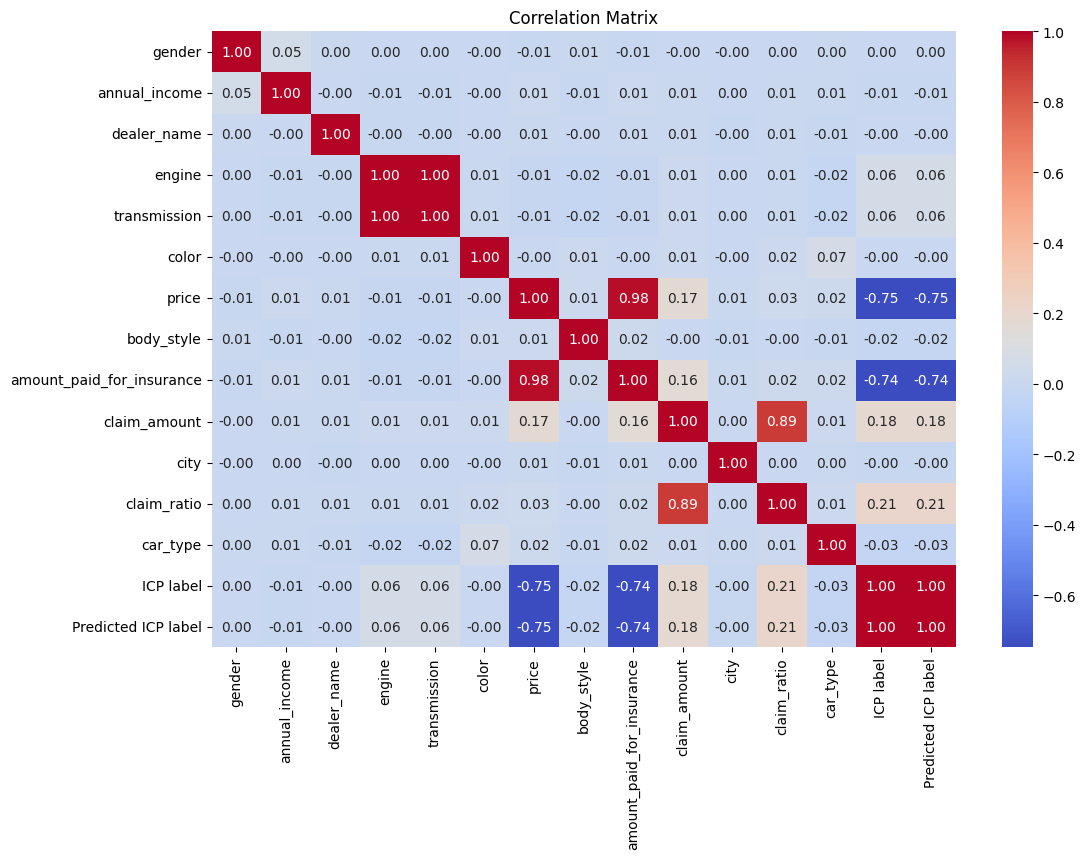

In [122]:
data_no_date = data.drop(columns=['date'])

correlation_matrix = data_no_date.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## **ML (2)** model (random forest regressor) for predicting Claim Ratio  and assigning Risk Labeling


To predict the claim_ratio and evaluate model performance, I first separated the target variable (claim_ratio) from the features in the dataset. Using a RandomForestRegressor, I trained the model on 80% of the data and tested it on the remaining 20%. I calculated performance metrics including R2,  MAE, MSE for both the training and test sets.  I also categorized each customer's risk level as 'High' or 'Low' based on whether their claim_ratio exceeded 0.5. Finally, I compared the predicted and actual claim_ratio values and printed a sample of this comparison along with their risk labels.

The comparison revealed that predictions were highly accurate, as seen in the sample where most 'Low' risk labels matched perfectly, and 'High' risk labels were closely predicted.

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

X = data_no_date.drop(columns=['claim_ratio'])
y = data_no_date['claim_ratio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training R2:", train_r2)
print("Test R2:", test_r2)
print("Training MAE:", train_mae)
print("Test MAE:", test_mae)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

# adding 'risk_label' based on claim_ratio
data_no_date['risk_label'] = ['High' if ratio > 0.5 else 'Low' for ratio in data_no_date['claim_ratio']]

print("\n Predicted vs Actual Values:")
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred, 'Risk Label': data_no_date.loc[y_test.index, 'risk_label']})
print(comparison.sample(n=20))


Training R2: 0.9999611923910072
Test R2: 0.9981513112752493
Training MAE: 0.000628173421312071
Test MAE: 0.0017456173146187307
Training MSE: 9.821656397434461e-06
Test MSE: 0.0004714649060651391

 Predicted vs Actual Values:
         Actual  Predicted Risk Label
4115   0.000000   0.000000        Low
3623   0.000000   0.000000        Low
19525  0.000000   0.000000        Low
4706   0.000000   0.000000        Low
18839  0.000000   0.000000        Low
10427  0.000000   0.000000        Low
20122  1.629766   1.625683       High
17512  0.000000   0.000000        Low
14911  0.000000   0.000000        Low
11266  0.000000   0.000000        Low
18355  0.000000   0.000000        Low
19534  0.000000   0.000000        Low
14832  0.000000   0.000000        Low
3211   0.000000   0.000000        Low
6515   0.000000   0.000000        Low
75     0.000000   0.000000        Low
17161  0.000000   0.000000        Low
2115   0.000000   0.000000        Low
2221   1.823899   1.819058       High
20052  0.000000

Here I plot the Feature Importance to understand which features have the most influence on the predicting target variable.

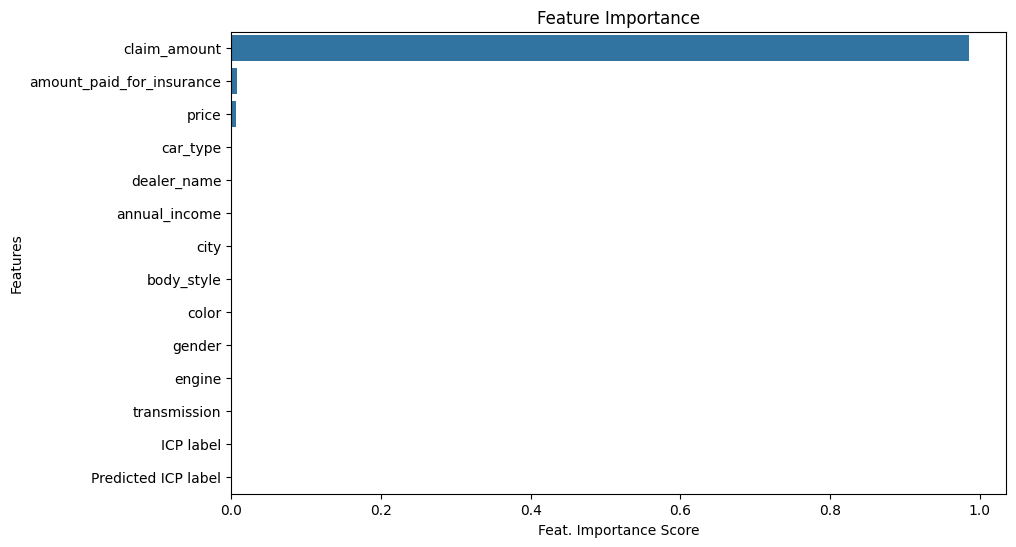

In [124]:
# define and plot feature importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Feat. Importance Score')
plt.ylabel('Features')
plt.show()

## ML (3) ARIMA model for Forecasting future claim ratio for risk assesment

To forecast future claim ratios, I first converted the 'date' column to a datetime format and set it as the index. I then calculated the average monthly claim ratio using resampling. To model the time series data, I employed an ARIMA model with specified parameters (5,1,0) and trained it on the historical claim ratios. After fitting the model, I generated future dates for the next 12 months and used the model to predict future claim ratios. The results were visualized in a plot showing historical data and future forecasts, providing a clear view of expected trends in claim ratios over the coming year.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


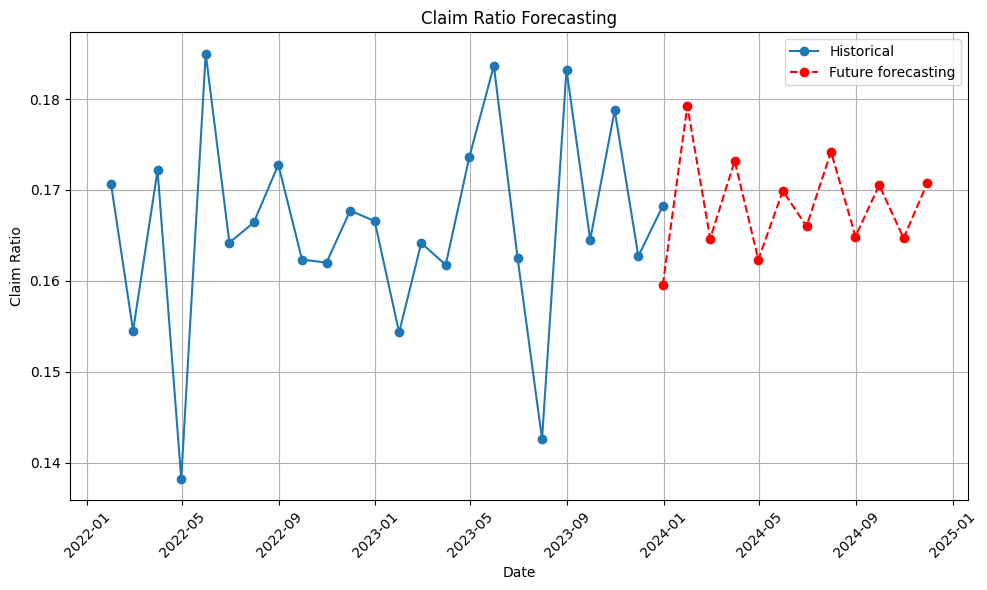

In [125]:
from statsmodels.tsa.arima.model import ARIMA

# 'date' column to date time
data['date'] = pd.to_datetime(data['date'])

# setting first year as in dataset
data.set_index('date', inplace=True)

# calculating claim ratio for each date
claim_ratio_by_date = data.resample('M').mean()['claim_ratio']

# training ARIMA
model = ARIMA(claim_ratio_by_date, order=(5,1,0))
model_fit = model.fit()

# create future dates
future_dates = pd.date_range(start=data.index[-1], periods=12, freq='M')

# future pred
future_predictions = model_fit.forecast(steps=12)

plt.figure(figsize=(10, 6))
plt.plot(claim_ratio_by_date.index, claim_ratio_by_date, marker='o', linestyle='-', label='Historical')
plt.plot(future_dates, future_predictions, marker='o', linestyle='--', color='red', label='Future forecasting')
plt.title('Claim Ratio Forecasting')
plt.xlabel('Date')
plt.ylabel('Claim Ratio')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [126]:
# in-sample predictions
in_sample_predictions = model_fit.predict(start=claim_ratio_by_date.index[0], end=claim_ratio_by_date.index[-1])

mae = mean_absolute_error(claim_ratio_by_date, in_sample_predictions)
mse = mean_squared_error(claim_ratio_by_date, in_sample_predictions)
rmse = np.sqrt(mse)

print(f" (MAE): {mae}")
print(f" (MSE): {mse}")
print(f" (RMSE): {rmse}")

 (MAE): 0.01546410053963279
 (MSE): 0.0013352645302797273
 (RMSE): 0.03654127160184395
